In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statistics import mean

## Loading data to verify if running only with 1 water has some impact

In [3]:
one_water = pd.read_csv('1_water_pure_silicate_glass.csv')
one_water.head(5).T

,0,1,2,3,4
Glass_number,glass_num_0,glass_num_0,glass_num_0,glass_num_0,glass_num_0
Filename,O_538_Si_597,O_1_Si_606,O_238_Si_614,O_430_Si_623,O_49_Si_627
Si_O_Si_Bond_angle,165.35545,134.179438,125.796872,167.970949,128.261568
O_Si_O_bond_angle,163.817986,161.834655,153.507315,158.208006,146.035677
number_bridge_oxygen,4,4,3,4,4
env_chem_si,4,4,3,4,4
env_chem_al,0,0,0,0,0
Activation_barrier,0.656303,0.806279,0.542326,0.725953,1.087752
initial_water_si_distance,3.254,3.273,3.396,3.278,3.321
Stress,-0.252007,-0.225995,-0.182279,-0.254495,-0.255139


In [4]:
all_water = pd.read_csv('all_water_pure_silicate_glass.csv')
all_water.head(5).T

,0,1,2,3,4
Glass_number,glass_num_0,glass_num_0,glass_num_0,glass_num_0,glass_num_0
Filename,O_538_Si_597,O_1_Si_606,O_238_Si_614,O_430_Si_623,O_49_Si_627
Si_O_Si_Bond_angle,165.35545,134.179438,125.796872,167.970949,128.261568
O_Si_O_bond_angle,163.817986,161.834655,153.507315,158.208006,146.035677
number_bridge_oxygen,4,4,3,4,4
env_chem_si,4,4,3,4,4
env_chem_al,0,0,0,0,0
Activation_barrier,0.90306,1.125352,0.833951,1.166612,1.201377
initial_water_si_distance,3.254,3.273,3.396,3.278,3.321
Stress,-0.252007,-0.225995,-0.182279,-0.254495,-0.255139


0.1980505762176724


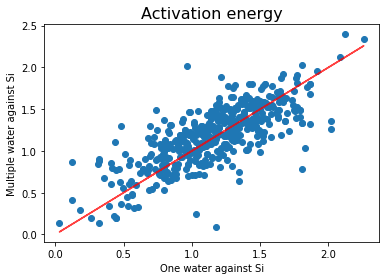

In [5]:
def before_after_10k_graph_analysis(Data_b4_10k, Data_aftr_10k, feature_to_be_analyzed, title):
    before_10k = []
    after_10k = []
    difference = []
    for lines1_1, lines1_2 in zip(Data_b4_10k['Filename'], Data_b4_10k[feature_to_be_analyzed]):
        for lines1_3, lines1_4 in zip(Data_aftr_10k['Filename'], Data_aftr_10k[feature_to_be_analyzed]):
            if lines1_1 == lines1_3:
                before_10k.append(lines1_2)
                after_10k.append(lines1_4)
                difference.append(abs(lines1_2 - lines1_4))
            else:
                pass
    
    print(mean(difference))

    f = plt.figure()
    axarr = f.add_subplot(1,1,1) # here is where you add the subplot to f
    plt.scatter(before_10k, after_10k)
    plt.xlabel('One water against Si')
    plt.ylabel('Multiple water against Si')
    plt.title(title, size=16)
    plt.plot(before_10k, before_10k, color='red', alpha=0.75)

    return f

x1_1 = before_after_10k_graph_analysis(one_water, all_water, feature_to_be_analyzed='Activation_barrier', title='Activation energy')

0.1980505762176724


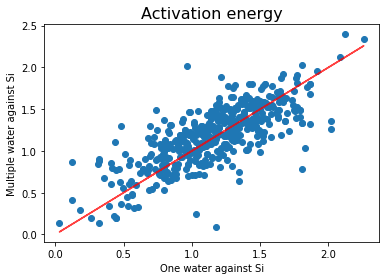

In [6]:
x1_1 = before_after_10k_graph_analysis(one_water, all_water, feature_to_be_analyzed='Activation_barrier', title='Activation energy')
plt.savefig('test.png', dpi=300)

0.9486941795258622


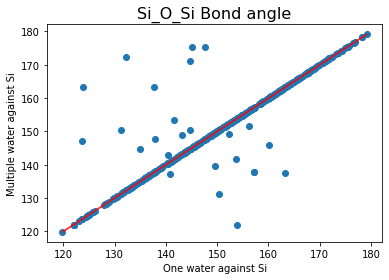

In [7]:
x1_1 = before_after_10k_graph_analysis(one_water, all_water, feature_to_be_analyzed='Si_O_Si_Bond_angle', title='Si_O_Si Bond angle')
plt.savefig('bond_angle.png', dpi=300)

In [8]:
selected_before_10k = []
selected_after_10k = []

for lines1_1, lines1_2 in zip(one_water['Filename'], one_water['Activation_barrier']):
    for lines1_3, lines1_4 in zip(all_water['Filename'], all_water['Activation_barrier']):
        if lines1_1 == lines1_3:
            selected_before_10k.append(lines1_2)
            selected_after_10k.append(lines1_4)
        else:
            pass

difference = (np.array(selected_before_10k) - np.array(selected_after_10k))/(np.array(selected_before_10k))

print(mean(difference))

-0.09296601363135654
